In [1]:
import keras
import numpy as np
from keras import datasets
from numpy.linalg import eig 
import matplotlib.pyplot as plt
from numpy import cov
from keras.datasets import mnist
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28*28)
mean = np.mean(x_train, axis=0)
centered = x_train - mean

cov_mat = cov(centered.T)
eig_val, eig_vec = eig(cov_mat)

In [5]:
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [8]:
eig_vec.shape

(784, 784)

In [3]:
dd = centered.dot(eig_vec[:,:2])

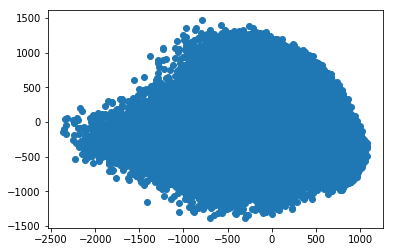

In [4]:
plt.scatter(dd[:,0], dd[:,1])